<a href="https://colab.research.google.com/github/eljimenezj/CM0891-Aprendizaje-Automatico-/blob/master/Ingenieria_Caracteristicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ingeniería de caracteristicas en Python

Este libro contiene un estudio de ingeniería de caracteristicas utilizando Python. Esto hace parte del curso de Aprendizaje Automático de la Maestría de Ciencia de Datos.

Los integrantes de este trabajo:

* Santiago Echeverri Calderon
* Edgar Leandro Jimenez Jaimes

Este libro se encuentra organizado de la siguiente manera:

* 1. Lectura de los datos y exploración inicial
* 2. Ingenieria de caracteristicas utilizando Feature Tools
* 3. Ingenieria de caracteristicas enfoque 2 
* 4. Evaluación de desemepeño de modelos con diferentes atributos del dataset






Vamos a instalar las librerias necesarias para la ejecución de este libro

In [0]:
#!pip install featuretools

Realizamos la importación de las librerias a utilizar

In [2]:
import pandas as pd
import numpy as np
import featuretools as ft
from featuretools.primitives import *
from featuretools.variable_types import Numeric
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing  import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import balanced_accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
#warnings.filterwarnings('ignore')


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Realizamos la carga del data set a utilizar:

El conjunto de datos a utilizar es Heart disease prediction, este es un dataset de un estudio cardiovascular en curso en los residentes de la ciudad de Framingham, Massachusetts. 

El objetivo de la clasificación es predecir si el paciente tiene riesgo de enfermedad coronaria en los próximos 10 años. El conjunto de datos proporciona la información del paciente. Incluye más de 4,000 registros y 15 atributos.  Existen factores de riesgo demográficos, conductuales y médicos.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df = pd.read_csv('/content/drive/My Drive/CM0891-Aprendizaje-Automatico/Datasets/Heart disease prediction.csv')

# Exploracion inicial del conjunto de datos

Realizamos una pequeña revision de los datos que acabamos de importar

In [5]:
print(df.columns.values)  # Observamos el nombre de las columnas que contiene  el dataset

['male' 'age' 'education' 'currentSmoker' 'cigsPerDay' 'BPMeds'
 'prevalentStroke' 'prevalentHyp' 'diabetes' 'totChol' 'sysBP' 'diaBP'
 'BMI' 'heartRate' 'glucose' 'TenYearCHD']


In [6]:
df.info()                 # Revisamos el tipo de datos por cada columna    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
male               4238 non-null int64
age                4238 non-null int64
education          4133 non-null float64
currentSmoker      4238 non-null int64
cigsPerDay         4209 non-null float64
BPMeds             4185 non-null float64
prevalentStroke    4238 non-null int64
prevalentHyp       4238 non-null int64
diabetes           4238 non-null int64
totChol            4188 non-null float64
sysBP              4238 non-null float64
diaBP              4238 non-null float64
BMI                4219 non-null float64
heartRate          4237 non-null float64
glucose            3850 non-null float64
TenYearCHD         4238 non-null int64
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [7]:
df.head(5)                # Imprimimos los primeros 5 registros del dataset

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [8]:
df.describe()           # Realizamos una estadistica descriptiva rapida del conjunto de datos

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


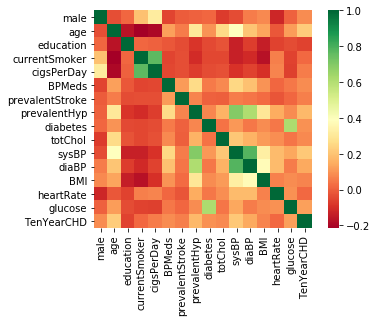

In [9]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')  # Revisamos rapidamente la matriz de correlacion

Vamos a revisar la calidad de los datos

In [10]:
df.isna().sum() # Revisamos cuantos NA tiene la información

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Vamos a eliminar los registros que contengan valores NA o nulos para efectos de modelación. En este libro no se va a realizar ningun tipo de imputación de datos ya que nos vamos a enfocar en la ingeniería de caracteristicas.

In [11]:
# Tamaño inicial del dataset
df.shape

# Eliminamos los registros con NA
df = df.dropna()

# Tamaño luego de retirar registros con NA
df.shape

(3656, 16)

# Ingenieria de caracteristicas utilizando `feature_tools`

Como punto de partida vamos a realizar la creación de nuevos atributos en el dataset a partir de las variables que ya tenemos actualmente. Para esto vamos a utilizar la librería `feature_tools` la cual crea de manera automatica los nuevos atributos utilizando agregación.

In [12]:
# Resetear el indice despues del borrado de los missing values
df2 = df.reset_index(drop=True)
df2.reset_index(inplace=True)
df2.head(3)

,index,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0


#### Creación de la entidad para generación de nuevos atributos


In [13]:
es = ft.EntitySet(id = 'heart_disease_data') # Almacena todos los datos reales para un conjunto de entidades

es = es.entity_from_dataframe(entity_id = 'df2', 
                              dataframe = df2.drop(['TenYearCHD'], 
                                                   axis=1),
                              variable_types = 
                              {
                                  'male': ft.variable_types.Boolean,
                                  'age': ft.variable_types.Numeric,
                                  'education': ft.variable_types.Ordinal,
                                  'currentSmoker': ft.variable_types.Boolean,
                                  'cigsPerDay': ft.variable_types.Numeric,
                                  'BPMeds': ft.variable_types.Boolean,
                                  'prevalentStroke': ft.variable_types.Boolean,
                                  'prevalentHyp': ft.variable_types.Boolean,
                                  'diabetes': ft.variable_types.Boolean,
                                  'totChol': ft.variable_types.Numeric,
                                  'sysBP': ft.variable_types.Numeric,
                                  'diaBP': ft.variable_types.Numeric,
                                  'BMI': ft.variable_types.Numeric,
                                  'heartRate': ft.variable_types.Numeric,
                                  'glucose': ft.variable_types.Numeric,
                              }, 
                              index = 'index')

es

Entityset: heart_disease_data
  Entities:
    df2 [Rows: 3656, Columns: 16]
  Relationships:
    No relationships

In [14]:
# normaliza_entity crea una nueva entidad y relación a partir de valores únicos de una variable existente.
es = es.normalize_entity(base_entity_id='df2', new_entity_id='male', index='male')
es = es.normalize_entity(base_entity_id='df2', new_entity_id='education', index='education')
es = es.normalize_entity(base_entity_id='df2', new_entity_id='currentSmoker', index='currentSmoker')
es = es.normalize_entity(base_entity_id='df2', new_entity_id='prevalentStroke', index='prevalentStroke')
es = es.normalize_entity(base_entity_id='df2', new_entity_id='prevalentHyp', index='prevalentHyp')
es = es.normalize_entity(base_entity_id='df2', new_entity_id='diabetes', index='diabetes')
es

Entityset: heart_disease_data
  Entities:
    df2 [Rows: 3656, Columns: 16]
    male [Rows: 2, Columns: 1]
    education [Rows: 4, Columns: 1]
    currentSmoker [Rows: 2, Columns: 1]
    prevalentStroke [Rows: 2, Columns: 1]
    prevalentHyp [Rows: 2, Columns: 1]
    diabetes [Rows: 2, Columns: 1]
  Relationships:
    df2.male -> male.male
    df2.education -> education.education
    df2.currentSmoker -> currentSmoker.currentSmoker
    df2.prevalentStroke -> prevalentStroke.prevalentStroke
    df2.prevalentHyp -> prevalentHyp.prevalentHyp
    df2.diabetes -> diabetes.diabetes

Ahora vamos a utiliza Deep Feature Synthesis (DFS) que es un método automatizado para realizar ingeniería de características en datos relacionales y temporales. La salida de esta ejecución son las nuevas caracteristicas y sus nombres.

In [0]:
features, feature_names = ft.dfs(entityset = es,           
                                 target_entity = 'df2',
                                 trans_primitives=[ft.primitives.Percentile],   
                                 max_depth = 2)           

In [16]:
features.head(3)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,PERCENTILE(age),PERCENTILE(cigsPerDay),PERCENTILE(totChol),PERCENTILE(sysBP),PERCENTILE(diaBP),PERCENTILE(BMI),PERCENTILE(heartRate),PERCENTILE(glucose),male.SUM(df2.age),male.SUM(df2.cigsPerDay),male.SUM(df2.totChol),male.SUM(df2.sysBP),male.SUM(df2.diaBP),male.SUM(df2.BMI),male.SUM(df2.heartRate),male.SUM(df2.glucose),male.STD(df2.age),male.STD(df2.cigsPerDay),male.STD(df2.totChol),male.STD(df2.sysBP),male.STD(df2.diaBP),male.STD(df2.BMI),male.STD(df2.heartRate),male.STD(df2.glucose),male.MAX(df2.age),...,diabetes.MAX(df2.diaBP),diabetes.MAX(df2.BMI),diabetes.MAX(df2.heartRate),diabetes.MAX(df2.glucose),diabetes.SKEW(df2.age),diabetes.SKEW(df2.cigsPerDay),diabetes.SKEW(df2.totChol),diabetes.SKEW(df2.sysBP),diabetes.SKEW(df2.diaBP),diabetes.SKEW(df2.BMI),diabetes.SKEW(df2.heartRate),diabetes.SKEW(df2.glucose),diabetes.MIN(df2.age),diabetes.MIN(df2.cigsPerDay),diabetes.MIN(df2.totChol),diabetes.MIN(df2.sysBP),diabetes.MIN(df2.diaBP),diabetes.MIN(df2.BMI),diabetes.MIN(df2.heartRate),diabetes.MIN(df2.glucose),diabetes.MEAN(df2.age),diabetes.MEAN(df2.cigsPerDay),diabetes.MEAN(df2.totChol),diabetes.MEAN(df2.sysBP),diabetes.MEAN(df2.diaBP),diabetes.MEAN(df2.BMI),diabetes.MEAN(df2.heartRate),diabetes.MEAN(df2.glucose),diabetes.COUNT(df2),diabetes.PERCENT_TRUE(df2.BPMeds),diabetes.NUM_UNIQUE(df2.male),diabetes.NUM_UNIQUE(df2.education),diabetes.NUM_UNIQUE(df2.currentSmoker),diabetes.NUM_UNIQUE(df2.prevalentStroke),diabetes.NUM_UNIQUE(df2.prevalentHyp),diabetes.MODE(df2.male),diabetes.MODE(df2.education),diabetes.MODE(df2.currentSmoker),diabetes.MODE(df2.prevalentStroke),diabetes.MODE(df2.prevalentHyp)
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0.111461,0.255607,0.167123,0.067287,0.124316,0.663156,0.685585,0.466493,80003,21804.0,378584.0,212876.0,135605.0,42360.01,120334.0,132903.0,8.542779,13.761522,41.103254,19.406784,11.508911,3.390656,11.627529,24.317237,69,...,142.5,56.8,143.0,163.0,0.251562,1.223848,0.533887,1.177512,0.692505,0.975017,0.674399,0.988822,32,0.0,113.0,83.5,48.0,15.54,44.0,40.0,49.401743,9.095586,236.51729,131.99002,82.810655,25.723843,75.608659,79.403992,3557,0.028957,2,4,2,2,2,0,1.0,0,0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0.398113,0.255607,0.644830,0.336023,0.470596,0.802653,0.930799,0.427243,101179,11181.0,487424.0,271061.5,167521.5,51906.97,156537.0,166363.0,8.573273,8.739338,46.168321,23.986809,12.308748,4.516267,12.122018,23.586245,70,...,142.5,56.8,143.0,163.0,0.251562,1.223848,0.533887,1.177512,0.692505,0.975017,0.674399,0.988822,32,0.0,113.0,83.5,48.0,15.54,44.0,40.0,49.401743,9.095586,236.51729,131.99002,82.810655,25.723843,75.608659,79.403992,3557,0.028957,2,4,2,2,2,0,1.0,0,0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0.472374,0.802790,0.603255,0.480170,0.422867,0.494393,0.517232,0.216220,80003,21804.0,378584.0,212876.0,135605.0,42360.01,120334.0,132903.0,8.542779,13.761522,41.103254,19.406784,11.508911,3.390656,11.627529,24.317237,69,...,142.5,56.8,143.0,163.0,0.251562,1.223848,0.533887,1.177512,0.692505,0.975017,0.674399,0.988822,32,0.0,113.0,83.5,48.0,15.54,44.0,40.0,49.401743,9.095586,236.51729,131.99002,82.810655,25.723843,75.608659,79.403992,3557,0.028957,2,4,2,2,2,0,1.0,0,0,0


In [17]:
print('El nuevo numero de atributos que con tiene el dataset es de',len(feature_names))

El nuevo numero de atributos que con tiene el dataset es de 383


In [0]:
#Podemos observar el nombre de las columnas que fueron creadas mediante: feature_names


In [18]:
features[features['diabetes'] == 1][["diabetes.MEAN(df2.age)","age","diabetes"]].head()

,diabetes.MEAN(df2.age),age,diabetes
index,,,
32,55.151515,52,1
38,55.151515,53,1
48,55.151515,54,1
58,55.151515,62,1
85,55.151515,63,1


In [19]:
features[features['diabetes'] == 0][["diabetes.MEAN(df2.age)","age","diabetes"]].head()

,diabetes.MEAN(df2.age),age,diabetes
index,,,
0,49.401743,39,0
1,49.401743,46,0
2,49.401743,48,0
3,49.401743,61,0
4,49.401743,46,0


#### Selección de atributos según colinealidad

Vamos analizar la matriz de correlacion mediante el coeficiente de pearson. En este punto se debe definir un umbral para definir con que variables me puedo quedar buscando reducir el numero inicial.

In [20]:
# Umbral para remover variables
threshold = 0.90

# Matriz de correlación en valor absoluto
corr_matrix = features.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head(50)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,PERCENTILE(age),PERCENTILE(cigsPerDay),PERCENTILE(totChol),PERCENTILE(sysBP),PERCENTILE(diaBP),PERCENTILE(BMI),PERCENTILE(heartRate),PERCENTILE(glucose),male.SUM(df2.age),male.SUM(df2.cigsPerDay),male.SUM(df2.totChol),male.SUM(df2.sysBP),male.SUM(df2.diaBP),male.SUM(df2.BMI),male.SUM(df2.heartRate),male.SUM(df2.glucose),male.STD(df2.age),male.STD(df2.cigsPerDay),male.STD(df2.totChol),male.STD(df2.sysBP),male.STD(df2.diaBP),male.STD(df2.BMI),male.STD(df2.heartRate),male.STD(df2.glucose),male.MAX(df2.age),...,diabetes.MAX(df2.diaBP),diabetes.MAX(df2.BMI),diabetes.MAX(df2.heartRate),diabetes.MAX(df2.glucose),diabetes.SKEW(df2.age),diabetes.SKEW(df2.cigsPerDay),diabetes.SKEW(df2.totChol),diabetes.SKEW(df2.sysBP),diabetes.SKEW(df2.diaBP),diabetes.SKEW(df2.BMI),diabetes.SKEW(df2.heartRate),diabetes.SKEW(df2.glucose),diabetes.MIN(df2.age),diabetes.MIN(df2.cigsPerDay),diabetes.MIN(df2.totChol),diabetes.MIN(df2.sysBP),diabetes.MIN(df2.diaBP),diabetes.MIN(df2.BMI),diabetes.MIN(df2.heartRate),diabetes.MIN(df2.glucose),diabetes.MEAN(df2.age),diabetes.MEAN(df2.cigsPerDay),diabetes.MEAN(df2.totChol),diabetes.MEAN(df2.sysBP),diabetes.MEAN(df2.diaBP),diabetes.MEAN(df2.BMI),diabetes.MEAN(df2.heartRate),diabetes.MEAN(df2.glucose),diabetes.COUNT(df2),diabetes.PERCENT_TRUE(df2.BPMeds),diabetes.NUM_UNIQUE(df2.male),diabetes.NUM_UNIQUE(df2.education),diabetes.NUM_UNIQUE(df2.currentSmoker),diabetes.NUM_UNIQUE(df2.prevalentStroke),diabetes.NUM_UNIQUE(df2.prevalentHyp),diabetes.MODE(df2.male),diabetes.MODE(df2.education),diabetes.MODE(df2.currentSmoker),diabetes.MODE(df2.prevalentStroke),diabetes.MODE(df2.prevalentHyp)
male,NaN,0.024387,0.017677,0.206778,0.331243,0.052128,0.002308,0.000806,0.013833,0.070229,0.045484,0.051575,0.072867,0.114923,0.003048,0.025557,0.293369,0.062646,0.016627,0.060492,0.133687,0.109910,0.008361,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.013833,0.013833,0.013833,0.013833,0.013833,0.013833,0.013833,0.013833,0.013833,0.013833,0.013833,0.013833,0.013833,NaN,0.013833,0.013833,0.013833,0.013833,0.013833,0.013833,0.013833,0.013833,0.013833,0.013833,0.013833,0.013833,0.013833,0.013833,0.013833,0.013833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013833
age,NaN,NaN,0.158961,0.210862,0.189099,0.134670,0.050864,0.306693,0.109027,0.267764,0.388551,0.208880,0.137172,0.002685,0.118245,0.995399,0.213860,0.282360,0.383919,0.204394,0.144740,0.005987,0.114511,0.024387,0.024387,0.024387,0.024387,0.024387,0.024387,0.024387,0.024387,0.024387,0.024387,0.024387,0.024387,0.024387,0.024387,0.024387,0.024387,0.024387,...,0.109027,0.109027,0.109027,0.109027,0.109027,0.109027,0.109027,0.109027,0.109027,0.109027,0.109027,0.109027,0.109027,NaN,0.109027,0.109027,0.109027,0.109027,0.109027,0.109027,0.109027,0.109027,0.109027,0.109027,0.109027,0.109027,0.109027,0.109027,0.109027,0.109027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.109027
education,NaN,NaN,NaN,0.025253,0.013527,0.013647,0.030353,0.079100,0.039547,0.012956,0.124511,0.058502,0.137280,0.064254,0.031874,0.157904,0.019756,0.016147,0.126958,0.063628,0.129753,0.061659,0.022233,0.017677,0.017677,0.017677,0.017677,0.017677,0.017677,0.017677,0.017677,0.017677,0.017677,0.017677,0.017677,0.017677,0.017677,0.017677,0.017677,0.017677,...,0.039547,0.039547,0.039547,0.039547,0.039547,0.039547,0.039547,0.039547,0.039547,0.039547,0.039547,0.039547,0.039547,NaN,0.039547,0.039547,0.039547,0.039547,0.039547,0.039547,0.039547,0.039547,0.039547,0.039547,0.039547,0.039547,0.039547,0.039547,0.039547,0.039547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.039547
currentSmoker,NaN,NaN,NaN,NaN,0.773819,0.051936,0.038159,0.107561,0.041859,0.051119,0.134371,0.115748,0.159574,0.050452,0.053346,0.208766,0.933314,0.051421,0.134703,0.122450,0.165854,0.058640,0.077470,0.206778,0.206778,0.206778,0.20677

In [21]:
collinear_features = [column for column in upper.columns if any(upper[column] > threshold)] # Columnas con correlación por encima del umbral

print('Hay  %d variables a remover.' % (len(collinear_features)))

Hay  298 variables a remover.


In [22]:
features_filtered = features.drop(columns = collinear_features) # Realizamos el filtro de las columnas que vamos a retirar

print('El número de variables que quedan es: ', features_filtered.shape[1])

El número de variables que quedan es:  85


In [23]:
features_filtered.head(3)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,PERCENTILE(glucose),male.MAX(df2.glucose),male.MIN(df2.cigsPerDay),male.MIN(df2.sysBP),male.MIN(df2.glucose),male.NUM_UNIQUE(df2.education),male.NUM_UNIQUE(df2.currentSmoker),male.NUM_UNIQUE(df2.prevalentStroke),male.NUM_UNIQUE(df2.prevalentHyp),male.NUM_UNIQUE(df2.diabetes),male.MODE(df2.education),male.MODE(df2.prevalentStroke),male.MODE(df2.prevalentHyp),male.MODE(df2.diabetes),education.STD(df2.age),education.STD(df2.cigsPerDay),education.STD(df2.totChol),education.STD(df2.glucose),education.MAX(df2.cigsPerDay),education.MAX(df2.glucose),education.SKEW(df2.cigsPerDay),education.MIN(df2.cigsPerDay),education.NUM_UNIQUE(df2.male),education.NUM_UNIQUE(df2.currentSmoker),education.NUM_UNIQUE(df2.prevalentHyp),...,currentSmoker.NUM_UNIQUE(df2.male),currentSmoker.NUM_UNIQUE(df2.education),currentSmoker.NUM_UNIQUE(df2.prevalentStroke),currentSmoker.NUM_UNIQUE(df2.prevalentHyp),currentSmoker.NUM_UNIQUE(df2.diabetes),currentSmoker.MODE(df2.education),currentSmoker.MODE(df2.prevalentStroke),currentSmoker.MODE(df2.prevalentHyp),currentSmoker.MODE(df2.diabetes),prevalentStroke.MIN(df2.cigsPerDay),prevalentStroke.NUM_UNIQUE(df2.male),prevalentStroke.NUM_UNIQUE(df2.currentSmoker),prevalentStroke.NUM_UNIQUE(df2.prevalentHyp),prevalentStroke.NUM_UNIQUE(df2.diabetes),prevalentStroke.MODE(df2.male),prevalentStroke.MODE(df2.education),prevalentStroke.MODE(df2.currentSmoker),prevalentStroke.MODE(df2.diabetes),prevalentHyp.MAX(df2.glucose),prevalentHyp.MIN(df2.cigsPerDay),prevalentHyp.MIN(df2.glucose),prevalentHyp.NUM_UNIQUE(df2.male),prevalentHyp.NUM_UNIQUE(df2.education),prevalentHyp.NUM_UNIQUE(df2.currentSmoker),prevalentHyp.NUM_UNIQUE(df2.prevalentStroke),prevalentHyp.NUM_UNIQUE(df2.diabetes),prevalentHyp.MODE(df2.male),prevalentHyp.MODE(df2.education),prevalentHyp.MODE(df2.prevalentStroke),prevalentHyp.MODE(df2.diabetes),diabetes.MIN(df2.cigsPerDay),diabetes.NUM_UNIQUE(df2.male),diabetes.NUM_UNIQUE(df2.education),diabetes.NUM_UNIQUE(df2.currentSmoker),diabetes.NUM_UNIQUE(df2.prevalentStroke),diabetes.NUM_UNIQUE(df2.prevalentHyp),diabetes.MODE(df2.male),diabetes.MODE(df2.education),diabetes.MODE(df2.currentSmoker),diabetes.MODE(df2.prevalentStroke)
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0.466493,394.0,0.0,83.5,40.0,4,2,2,2,2,1.0,0,0,0,8.285730,12.417844,40.351822,16.024154,60.0,183.0,1.154373,0.0,2,2,2,...,2,4,2,2,2,1.0,0,0,0,0.0,2,2,2,2,0,1.0,0,0,394.0,0.0,40.0,2,4,2,2,2,0,1.0,0,0,0.0,2,4,2,2,2,0,1.0,0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0.427243,394.0,0.0,83.5,40.0,4,2,2,2,2,1.0,0,0,0,8.296487,11.817173,46.493689,22.116877,60.0,394.0,1.046002,0.0,2,2,2,...,2,4,2,2,2,1.0,0,0,0,0.0,2,2,2,2,0,1.0,0,0,394.0,0.0,40.0,2,4,2,2,2,0,1.0,0,0,0.0,2,4,2,2,2,0,1.0,0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0.216220,394.0,0.0,83.5,40.0,4,2,2,2,2,1.0,0,0,0,8.414159,12.035009,43.073275,25.261233,60.0,386.0,1.341062,0.0,2,2,2,...,2,4,2,2,2,1.0,0,0,0,0.0,2,2,2,2,0,1.0,0,0,394.0,0.0,40.0,2,4,2,2,2,0,1.0,0,0,0.0,2,4,2,2,2,0,1.0,0,0


#### Detectar las características más relevantes utilizando los pesos de un clasificador SVM lineal

Los pasos que vamos a seguir en este apartado son los siguientes:

* Paso 1: Generar conjunto de datos descriptores y de variable target
* Paso 2: Escalar los datos
* Paso 3: Partición de datos en train y testeo
* Paso 4: OverSamplig sobre datos de entrenamiento para balenceo de clases
* Paso 5: Ejecución del modelo SVM para detectar caracteristicas



In [24]:
features_positive = features_filtered.loc[:, features_filtered.ge(0).all()] # Revisamos que las columnas sean positivas
features_positive.shape

(3656, 85)

In [0]:
# Paso 1: Generamos dos conjuntos, uno con la varible a clasificar y otro con las descriptoras

y = df2['TenYearCHD'].values # Variable target
X = features_positive        # Variables descriptoras con nuevas caracteristicas

Vamos a revisar cuantos registros tenemos pertencientes a la clase que queremos clasificar. Sabemos que hay mas registros de una clase que de otra, por lo cual debemos balancear la clases para realizar el entrenamiento.

In [26]:
print(sorted(Counter(y).items()))

[(0, 3099), (1, 557)]


In [0]:
# Paso 2: vamos a escalar los datos descriptores 
colnames = features_positive.columns.values

scaler = MinMaxScaler()                    # Utilizamos min max escaler
scaled_X = scaler.fit_transform(X)         # Ejecutamos el escalado
df_scaled_X = pd.DataFrame(scaled_X)       # Convertimos a dataframe
df_scaled_X.columns = colnames             # Nombre de columnas 

# Paso 3: hacemos la particion de los datos ahora escalados
test_size = 0.2
train_X, test_X, train_y, test_y = train_test_split(df_scaled_X,y, test_size = test_size, random_state=42,stratify=y)

Ahora vamos a realizar una tecnica de oversampling para los datos de entrenamiento, de tal manera que contemos con la misma cantindad de clases y se pueda entrenar el modelo. Para ello utilizaremos la funcion `SMOTE` de la librería `imblearn.over_sampling`

In [28]:
# Paso 4: es realizar el oversampling para el conjunto de entrenamiento

sm = SMOTE(sampling_strategy='auto')             # Instanciamos la función
X_res, y_res = sm.fit_resample(train_X, train_y) # La ejecutamos sobre nuestros datos de train


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [29]:
# Observemos el numero de registros por clases

print(sorted(Counter(y_res).items()))

[(0, 2479), (1, 2479)]


Como se observa, luego de realizar el oversampling ahora contamos con la misma cantidad de registros de clase 0 y de clase 1 para nuestros datos de entrenamiento. 

In [30]:
#  Paso 5 :Configurar modelo svm
lsvc = LinearSVC(C=1,                              # Parámetro de regularización, este parametro se dejo como viene por defecto de la libreria
                 penalty="l1",                     # utilziamos regularizacion L1 para seleccion de caracteristicas 
                 max_iter = 20000,                 # Numero maximo de iteracion        
                 dual=False).fit(X_res, y_res) 

# Configurar modelo de selección de variables

model = SelectFromModel(lsvc, prefit=True)        # Meta-transformador para seleccionar características basadas en pesos de importancia.
X_new = model.transform(X_res)
X_selected_df = pd.DataFrame(X_new, columns=[train_X.columns[i] for i in range(len(train_X.columns)) if model.get_support()[i]])
print('Ahora hay %d variables que vamos a tener en cuenta.' % X_selected_df.shape[1])

Ahora hay 18 variables que vamos a tener en cuenta.


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Este nuevo resultado es obtenido luego correr el modelo SVM con regularización L1 el cual nos dio como resultado las caracteristicas mas relevantes


In [31]:
# Hacemos este proceso para los datos de testeo
X_new_test = model.transform(test_X)
X_selected_df_test = pd.DataFrame(X_new_test, columns=[test_X.columns[i] for i in range(len(test_X.columns)) if model.get_support()[i]])
X_selected_df_test.shape

(732, 18)

In [32]:
lsvc.coef_ # Esta sentencia nos imprime el valor de los coeficientes

array([[ 0.16357427,  1.30215176, -0.15584361,  0.07838089,  0.49481494,
         0.0499889 ,  0.        ,  0.13151623, -0.19177731,  0.75275957,
         1.03328505,  0.05896416,  0.15878159, -0.1016321 ,  1.94571921,
        -0.30751263,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.01397143, -0.10414391,  0.        ,  0.        , -0.03021684,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

In [33]:
print('El numero de caracteristicas ANTES de ejecutar el modelo SVM con regularización es de', X_res.shape[1])
print('El nuevo numero de caracteristicas DESPUES de ejecutar el modelo SVM con regularización es de',X_new.shape[1])

El numero de caracteristicas ANTES de ejecutar el modelo SVM con regularización es de 85
El nuevo numero de caracteristicas DESPUES de ejecutar el modelo SVM con regularización es de 18


In [34]:
# Observemos que variables quedaron
X_selected_df.head(3)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,PERCENTILE(glucose),education.STD(df2.cigsPerDay),education.STD(df2.totChol),education.MAX(df2.glucose)
0,0.0,0.894737,0.333333,1.0,0.128571,0.0,0.0,0.0,0.229979,0.125296,0.296296,0.065196,0.393939,0.127119,0.713875,0.426903,1.000000,1.0
1,1.0,0.184211,1.000000,1.0,0.014286,0.0,0.0,0.0,0.102669,0.215130,0.380952,0.132574,0.161616,0.225989,0.973591,1.000000,0.000000,0.0
2,1.0,0.657895,0.666667,0.0,0.000000,0.0,0.0,0.0,0.256674,0.212766,0.417989,0.238488,0.363636,0.138418,0.799535,0.000000,0.697838,1.0


In [35]:
print('Las variables que quedaron luego del proceso de regularización fueron',X_selected_df.columns.values)

Las variables que quedaron luego del proceso de regularización fueron ['male' 'age' 'education' 'currentSmoker' 'cigsPerDay' 'BPMeds'
 'prevalentHyp' 'diabetes' 'totChol' 'sysBP' 'diaBP' 'BMI' 'heartRate'
 'glucose' 'PERCENTILE(glucose)' 'education.STD(df2.cigsPerDay)'
 'education.STD(df2.totChol)' 'education.MAX(df2.glucose)']


Lo que vamos a realizar ahora es una prueba con dos clasificadores utilizando dos enfoques, el primero es utilizando el conjunto de datos original, es decir sin niguna ingenieria de caracteristicas y el segundo enfoque es utilizando el nuevo conjunto de datos que dio como resultado todo el proceso de caracteristicas


# Evaluación de desempeño de modelos con diferentes atributos

### Modelos con variables originales

Vamos a utilizar dos clasificadores como se especifico anteriormente, estos son:

* Clasificador 1: RandomForest ->`RandomForestClassifier`
* Clasificador 2: Regresion logistica ->`LogisticRegression`

In [0]:
# CLASIFICADOR 1

# Datos descriptores originales
X_o = df2.drop('TenYearCHD', 1) 
colnames_o = X_o.columns.values

# Escalamiento de datos originales 
scaler = MinMaxScaler()                    # Utilizamos min max escaler
scaled_X_o = scaler.fit_transform(X_o)       # Ejecutamos el escalado
df_scaled_X_o = pd.DataFrame(scaled_X_o)   # Convertimos a dataframe
df_scaled_X_o.columns = colnames_o             # Nombre de columnas 

# Particion de los datos ahora escalados
test_size = 0.2
train_X_o, test_X_o, train_y_o, test_y_o = train_test_split(df_scaled_X,y, test_size = test_size, random_state=42, stratify=y)


In [37]:
# Realizamos el proceso de oversampling nuevamente para los datos originales

sm = SMOTE(sampling_strategy='auto')                     # Instanciamos la función
X_res_o, y_res_o = sm.fit_resample(train_X_o, train_y_o) # La ejecutamos sobre nuestros datos orginales de train

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [38]:
# Entrenamiento de Random Forest con variables originales
random_forest_o = RandomForestClassifier(n_estimators=8000,   # Instanciamos el random forest con los parametros
                                         oob_score=True)
random_forest_o.fit(X_res_o, y_res_o)                         # Entrenamos el modelo con los datos luego de oversampling

y_pred_o = random_forest_o.predict(test_X_o)                  # Predecimos con datos de testeo

print(classification_report(test_y_o, y_pred_o))              # Revisamos metricas

              precision    recall  f1-score   support

           0       0.87      0.90      0.89       620
           1       0.34      0.29      0.31       112

    accuracy                           0.81       732
   macro avg       0.61      0.59      0.60       732
weighted avg       0.79      0.81      0.80       732



In [39]:
# CLASIFICADOR 2

logreg_o = LogisticRegression(max_iter = 2000)                  # Instanciamos el modelo de regresion logistica
logreg_o.fit(X_res_o, y_res_o)                                  # Entrenamos con datos luego de oversampling
y_pred_o = logreg_o.predict(test_X_o)                           # Predecimos con datos de testeo 
print(classification_report(test_y, y_pred_o))                  # Revisamos metricas

              precision    recall  f1-score   support

           0       0.93      0.68      0.78       620
           1       0.28      0.70      0.40       112

    accuracy                           0.68       732
   macro avg       0.60      0.69      0.59       732
weighted avg       0.83      0.68      0.72       732



Como resultados podemos decir que

### Modelos con variables creadas con ingeneria de caracteristicas

Vamos a utilizar dos clasificadores como se especifico anteriormente, estos son:

* Clasificador 1: RandomForest ->`RandomForestClassifier`
* Clasificador 2: Regresion logistica ->`LogisticRegression`

In [0]:
# Recordemos el conjunto de datos que dio como resultado el modelo de SVM -> X_selected_df

names_list_n = X_selected_df.columns.values   # Nombre de columnas luego de regularazación

y = df2['TenYearCHD'].values                  # Variable target

X_n = features_positive[names_list_n]         # Variables descriptoras con nuevas caracteristicas
colnames_n = X_n.columns.values

# Escalamiento de datos  
scaler = MinMaxScaler()                       # Utilizamos min max escaler
scaled_X_n = scaler.fit_transform(X_n)        # Ejecutamos el escalado
df_scaled_X_n = pd.DataFrame(scaled_X_n)      # Convertimos a dataframe
df_scaled_X_n.columns = colnames_n            # Nombre de columnas 

In [0]:
# Particion de los datos ahora escalados
test_size = 0.2
train_X_n, test_X_n, train_y_n, test_y_n = train_test_split(df_scaled_X_n,y, test_size = test_size, random_state=42, stratify=y)

In [42]:
# Realizamos el proceso de oversampling nuevamente para el nuevo dataset con mas variables

sm = SMOTE(sampling_strategy='auto')                     # Instanciamos la función
X_res_n, y_res_n = sm.fit_resample(train_X_n, train_y_n) # La ejecutamos sobre nuestros datos orginales de train

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [43]:
# Entrenamiento de Random Forest con nuevas variables
random_forest_n = RandomForestClassifier(n_estimators=2000, # Instanciamos el random forest con los parametros
                                         oob_score=True)
random_forest_n.fit(X_res_n, y_res_n)                       # Entrenamos el modelo con los datos luego de oversampling

y_pred_n = random_forest_n.predict(test_X_n)                # Predecimos con datos de testeo

print(classification_report(test_y_n, y_pred_n))            # Revisamos metricas

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       620
           1       0.32      0.32      0.32       112

    accuracy                           0.79       732
   macro avg       0.60      0.60      0.60       732
weighted avg       0.79      0.79      0.79       732



In [44]:
# Entrenamiento de Regresion Logistica con nuevas variables
logreg_n = LogisticRegression(max_iter=2000)          # Instanciamos la regresion con los parametros
logreg_n.fit(X_res_n, y_res_n)                        # Entrenamos el modelo con los datos luego de oversampling
y_pred_n = logreg_n.predict(test_X_n)                 # Predecimos con datos de testeo
print(classification_report(test_y_n, y_pred_n))      # Revisamos metricas   

              precision    recall  f1-score   support

           0       0.92      0.68      0.79       620
           1       0.28      0.68      0.40       112

    accuracy                           0.68       732
   macro avg       0.60      0.68      0.59       732
weighted avg       0.82      0.68      0.73       732

